# Proyecto Segmentación Semántica
---

Integrantes:

- *Ignacio Chirino*
- *Bastián Muñoz* 



### Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import torch
import cv2
from PIL import Image

## Montamos nuestro google drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Incluímos una variable llamada `images_directory` que contiene la ruta de las imágenes

In [3]:
images_directory = '../Images/'

In [4]:
files = os.listdir(images_directory) # Listamos todos los archivos del directorio

#Método que retorna una lista con todos los archivos de un directorio en formato PIL (imágenes)
def load_images_from_folder():
    images = []
    for file in files:
        #print(type(img))
        path_file = images_directory+file
        if not os.path.isdir(path_file):
            img = Image.open(path_file)
            if img is not None:
                images.append(img)
    print('Images are ready !')
    return images

In [5]:
images = load_images_from_folder()

Images are ready !


## Graficamos una imagen de prueba

La imagen a graficar no es de nuetra propiedad, sino que esta [aquí](https://es.wikipedia.org/wiki/Archivo:Vista_satelital_santa_fe.jpg)

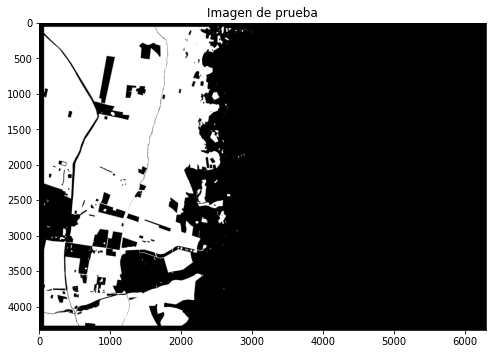

In [6]:
plt.figure(num=1, figsize=(8, 6))
plt.title('Imagen de prueba')
plt.imshow(images[4])
plt.show() # Para no mostrar etiqueta <matplotlib.image.AxesImage at....>

# Gráficamos múltiples imágenes
---

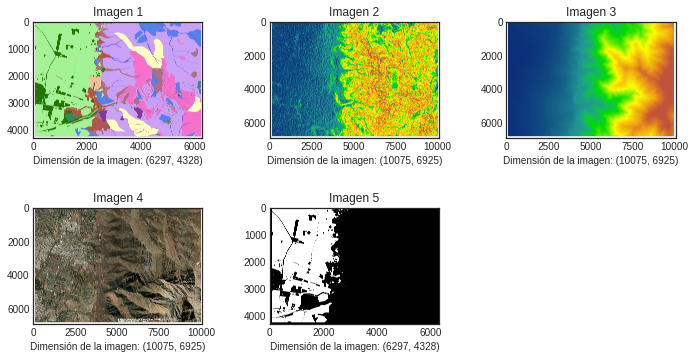

In [7]:
plt.style.use('seaborn-white')
plt.figure(1, figsize=(14,14))

for (idx, img) in enumerate(images[:6]):
    plt.subplot(2, 3, idx+1)
    plt.title(f'Imagen {idx+1}')
    plt.xlabel(f'Dimensión de la imagen: {images[idx].size}')
    plt.imshow(img, cmap='gray')

plt.subplots_adjust(top=0.4, bottom=0.1, left=0.1, right=0.75, wspace=0.3, hspace=0.6) # Importante
plt.show()

Definimos variable que contiene a la máscara urbana

In [8]:
urban_mask = images[4]; print(type(urban_mask))

<class 'PIL.PngImagePlugin.PngImageFile'>


## Función para particionar imagen

In [9]:
def crop(path, input, height, width, k, page, area):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                o = a.crop(area)
                o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
            except:
                pass
            k +=1

In [10]:
#os.mkdir('./Images/CropImages')

In [11]:
width, height = images[4].size
n_images = 150

crop_width = width // n_images
crop_height = height // n_images

print(f'Dimensión imagenes pequeñas: {crop_width}, {crop_height}')

Dimensión imagenes pequeñas: 41, 28


In [12]:
left   = 72
top    = 55
bottom = top + crop_height
right = left + crop_width
im_1 = images[4].crop((left, top, right, bottom))

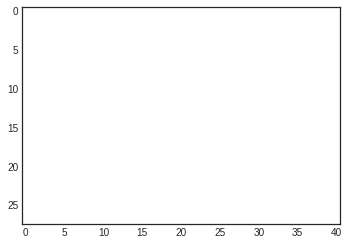

In [13]:
plt.imshow(im_1); plt.show()

In [14]:
left   = 72
init_left   = 72
top    = 55
init_top = 55
iterator = 1
# for h in range(init_top, height-init_top, crop_height):
    
#     bottom = crop_height + top
    
#     for w in range(init_left, width-init_left, crop_width):
        
#         right  = left + crop_width
        
#         img_crop = images[4].crop((left, top, right, bottom))
#         img_crop.save(f'./Images/CropImages/Img_{iterator}.jpg', 'JPEG')
        
#         iterator += 1
        
#         if(w == init_left):
#             left += crop_width
#         else:
#             left += w
        
#     if (h == init_top):
#         top  += crop_height
#     else:    
#         top  += h
    
#     if(iterator == 30):
#         break

Prueba para saber si se guarda bien en git, ahora si estoy usando kernel python 3